# 

In [3]:
#IMPORT REQUIRED LIBRARIES
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf 

In [4]:
#READ  DATASET
df = pd.read_csv('kc_house_data.csv')

In [5]:
#DATASET HEAD
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
#GET DATASET INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
#MORE DETAILS OF THE DATASET WITH DESCRIBE METHOD
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#CHECK THE NUMBER OF NULLS IN THE DATASET 
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<AxesSubplot:>

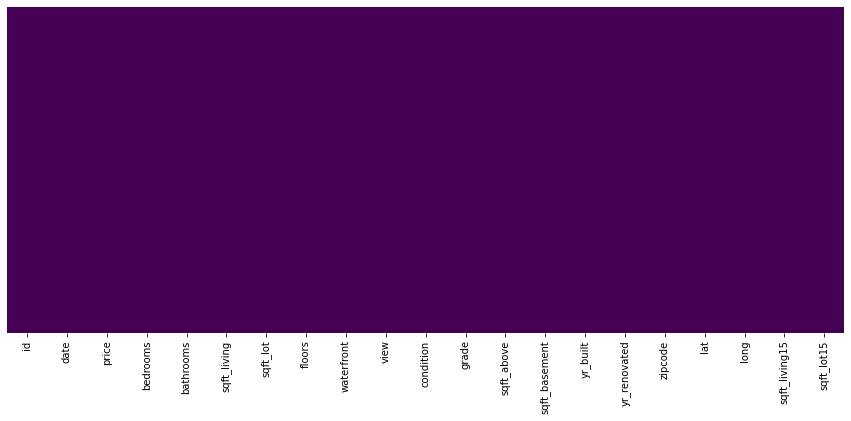

In [9]:
#VISUALIZATION OF NULLS IN THE DATASET WITH HEATMAP
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

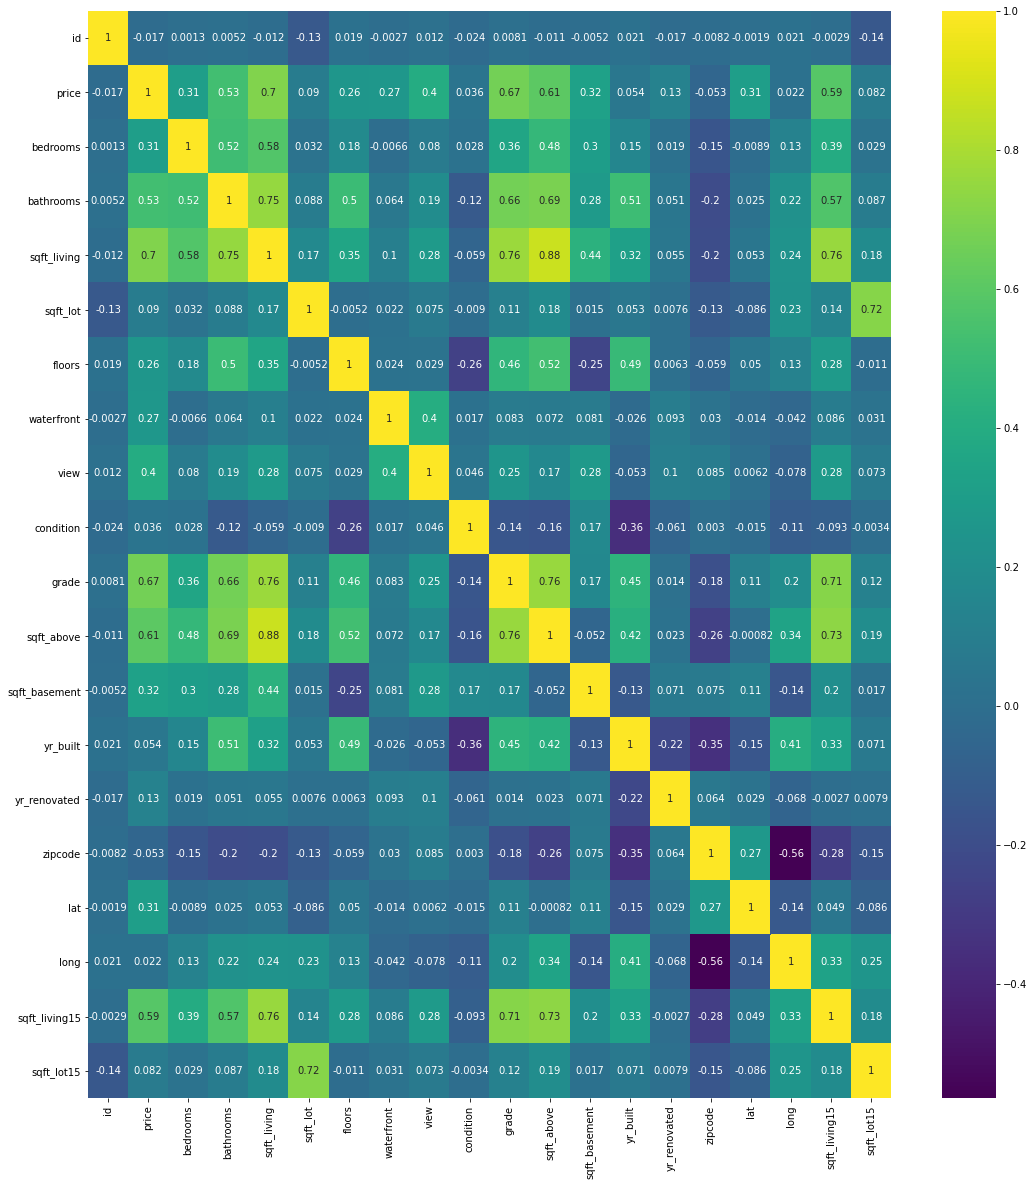

In [10]:
#PLOT CORRELATION MATRICS
plt.figure(figsize=(18,20))
sns.heatmap(df.corr(),cmap="viridis",annot=True);

In [11]:
#SORT FEATURES BY CORRELATION  
df.corr()['price'].sort_values(ascending=True)

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<Figure size 1080x360 with 0 Axes>

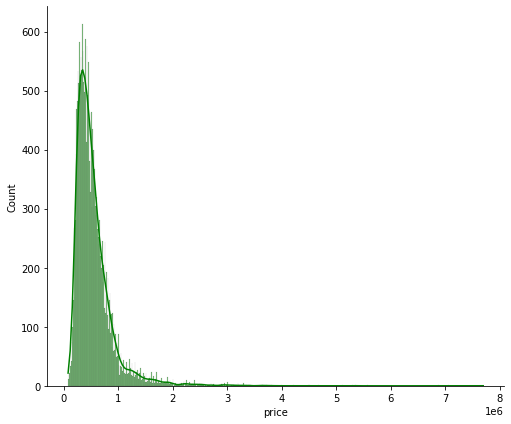

In [12]:
#PLOT DISTRIBUTION OF PRICEIN THE DATAFRAME 
plt.figure(figsize=(15,5))
sns.displot(df.price,kde=True,bins=600,color='green',height=6,aspect = 1.2  )

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

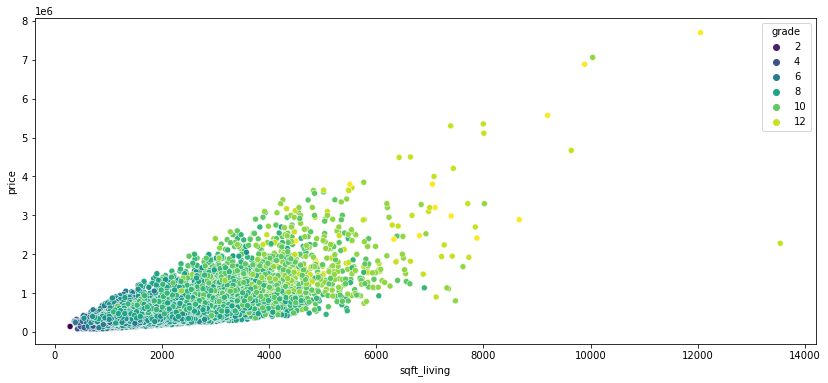

In [13]:
#SEE THE RELATIONSHIP BETWEEN sqft_living AND price BY SCATTERPLOT
plt.figure(figsize=(14,6))
sns.scatterplot(x='sqft_living',y='price',data=df,hue='grade',palette="viridis")

<AxesSubplot:xlabel='long', ylabel='lat'>

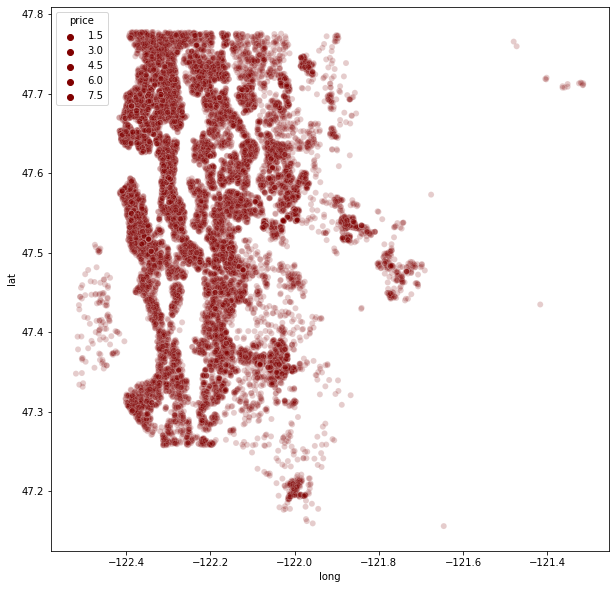

In [14]:
#SEE THE RELATIONSHIP BETWEEN LOCATION (long,lat) AND price BY SCATTERPLOT
plt.figure(figsize=(10,10))
sns.scatterplot(x='long',y='lat',data=df,hue='price',alpha=0.2, palette="seismic", hue_norm=(2,12))

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

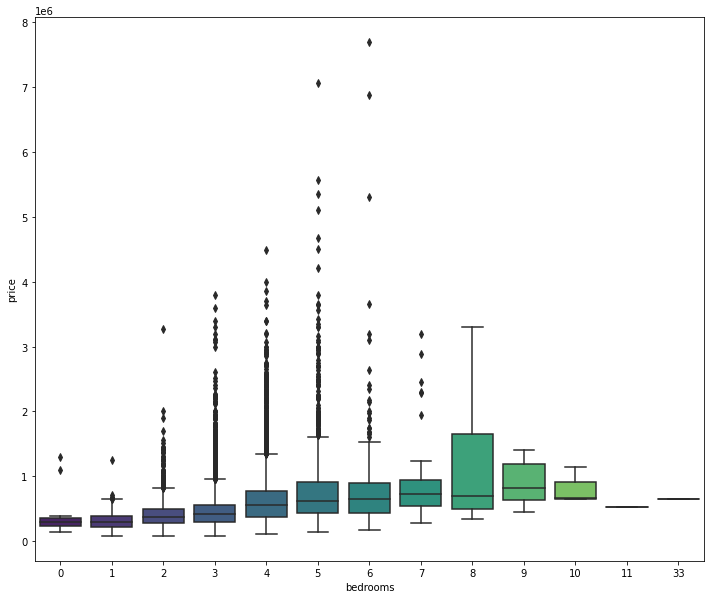

In [15]:
#VISUALIZATION OF price BASED ON NUBMER OF bedrooms WITH BOXPLOT
plt.figure(figsize=(12,10))
sns.boxplot( x='bedrooms',
    y='price',
      data=df,
           palette='viridis')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

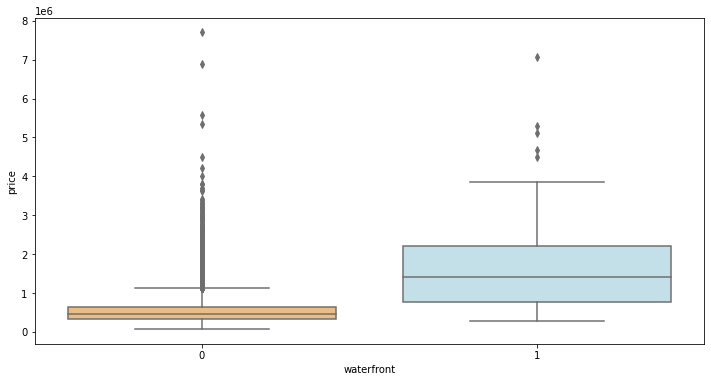

In [16]:
#VISUALIZATION OF price BASED ON NUBMER OF waterfront WITH BOXPLOT
plt.figure(figsize=(12,6))
sns.boxplot(x='waterfront',y='price',data=df,
    palette='RdYlBu')

In [17]:
#CONVERT TO DATETIME DATATYPE 
df['date'] =pd.to_datetime(df['date'])

In [18]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [19]:
#GET YEAR AND MONTH FROM DATE 
df['year']= df['date'].apply(lambda date : date.year)
df['month']= df['date'].apply(lambda date : date.month)

In [20]:
#DROP COLUMNS BASED ON VERY LESS CORRELATION WITH PRICE
df=df.drop(['id','date','zipcode'],axis=1)

In [21]:
#NEW DATAFRAME
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

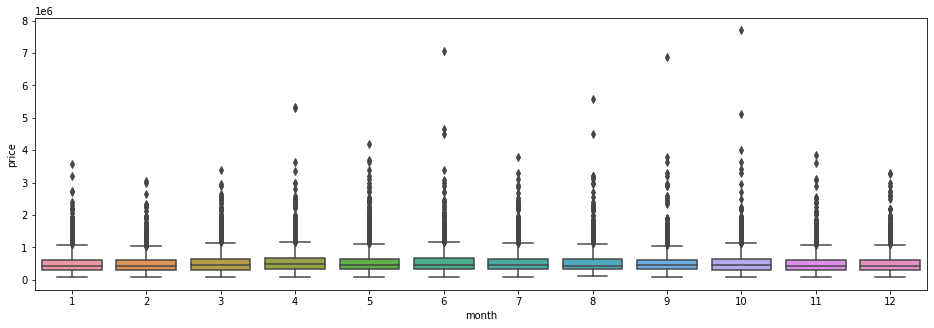

In [22]:
plt.figure(figsize=(16,5))
sns.boxplot(x='month',y='price',data=df)

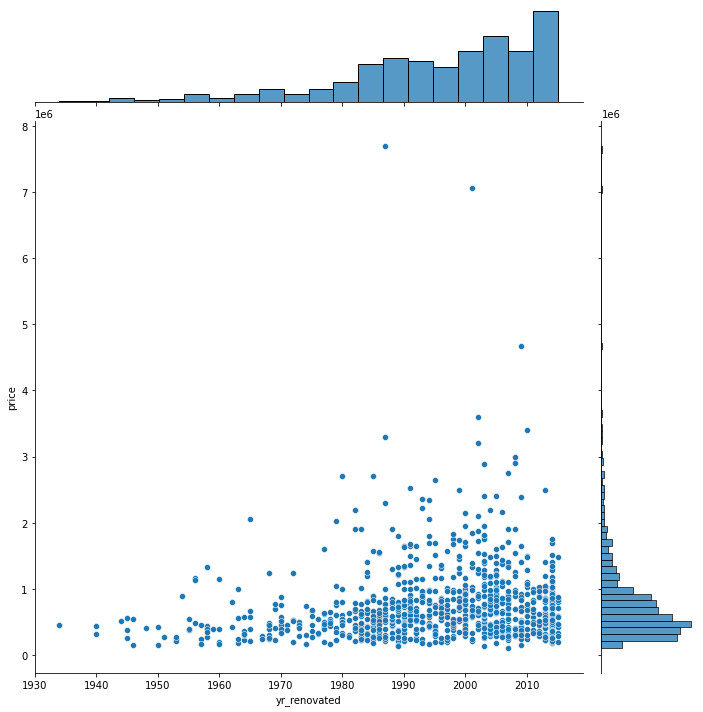

In [23]:
#CHANGE IN price BASED ON yr_renovated
sns.jointplot(x='yr_renovated',y='price',data=df[df['yr_renovated']>0],height =10)

<AxesSubplot:xlabel='month'>

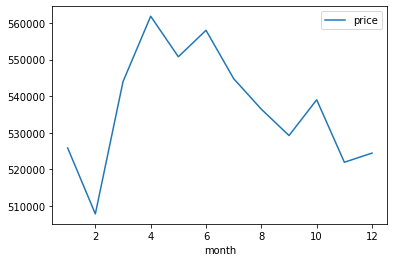

In [24]:
#price FLUCTUATION BY month
df[['price','month']].groupby('month').mean().plot()

<AxesSubplot:xlabel='year'>

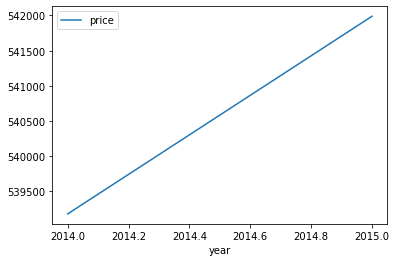

In [25]:
#price FLUCTUATION BY year
df[['year','price']].groupby('year').mean().plot()

<Figure size 1152x360 with 0 Axes>

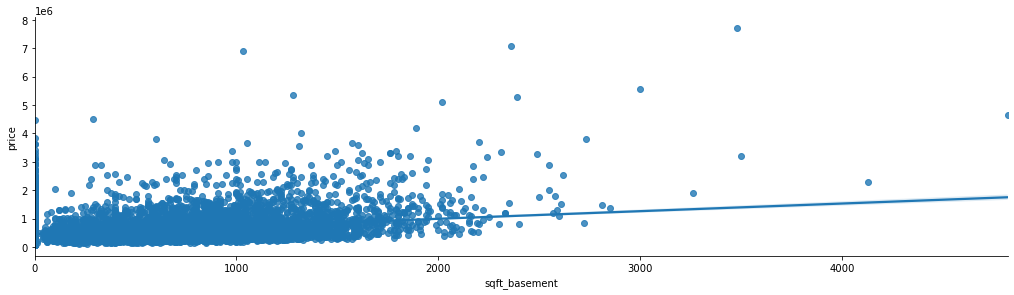

In [26]:
#REGRESSION PLOT OF  sqft_basement AND price
plt.figure(figsize=(16,5))
sns.lmplot(x='sqft_basement',y='price',data=df,height=4,aspect=3.5,legend=True)

In [27]:
#X- FEATURE , Y- TARGET
X=df.drop('price',axis=1).values
y=df.price.values

In [28]:
#IMPORT train_test_split AND SPLIT THE DATA INTO TRINING AND TESTING SETS
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)

In [29]:
#IMPORT MinMaxScaler FOR SCALING THE DATA  
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


In [30]:
X_train =scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [70]:
#IMPORT Sequential MODEL 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [71]:
X_train.shape

(14480, 19)

In [107]:
#INITIALIZE AND ADD LAYERS TO Sequential  MODEL
model = Sequential()

model.add(Dense(25,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [109]:
es = EarlyStopping(monitor='val_loss', mode='min',verbose =1 ,patience = 15)

In [110]:
#FIT THE DATA BY TRAINING  
model.fit(x=X_train,y=y_train,
             validation_data=(X_test,y_test),
             batch_size=128,
             epochs=750,
             callbacks =[es])

Train on 14480 samples, validate on 7133 samples
Epoch 1/750
14480/14480 [==============================] - 1s 60us/sample - loss: 423725303280.7249 - val_loss: 431946840451.3198
Epoch 2/750
14480/14480 [==============================] - 0s 20us/sample - loss: 423086643265.6265 - val_loss: 430050848240.2804
Epoch 3/750
14480/14480 [==============================] - 0s 21us/sample - loss: 417449049025.7679 - val_loss: 418493336467.0394
Epoch 4/750
14480/14480 [==============================] - 0s 20us/sample - loss: 395161906860.5525 - val_loss: 382573130174.1786
Epoch 5/750
14480/14480 [==============================] - 0s 20us/sample - loss: 342235386611.8364 - val_loss: 312352383158.6059
Epoch 6/750
14480/14480 [==============================] - 0s 19us/sample - loss: 261716226668.0575 - val_loss: 220967252600.2299
Epoch 7/750
14480/14480 [==============================] - 0s 20us/sample - loss: 177787626078.4796 - val_loss: 145567290905.3380
Epoch 8/750
14480/14480 [================

Epoch 64/750
14480/14480 [==============================] - 0s 18us/sample - loss: 69725525131.1735 - val_loss: 52072006129.8595
Epoch 65/750
14480/14480 [==============================] - 0s 18us/sample - loss: 69067575019.9160 - val_loss: 51991076136.4475
Epoch 66/750
14480/14480 [==============================] - 0s 18us/sample - loss: 68306844265.7945 - val_loss: 51645160038.1416
Epoch 67/750
14480/14480 [==============================] - 0s 18us/sample - loss: 68337636654.1083 - val_loss: 51658318703.7241
Epoch 68/750
14480/14480 [==============================] - 0s 22us/sample - loss: 66948706978.3691 - val_loss: 51177535515.2760
Epoch 69/750
14480/14480 [==============================] - 0s 23us/sample - loss: 68056134360.6807 - val_loss: 51128590600.7212
Epoch 70/750
14480/14480 [==============================] - 0s 23us/sample - loss: 68558948802.3337 - val_loss: 50830043591.6534
Epoch 71/750
14480/14480 [==============================] - 0s 20us/sample - loss: 66523740325.19

14480/14480 [==============================] - 0s 20us/sample - loss: 61962162637.6486 - val_loss: 44460655774.3446
Epoch 128/750
14480/14480 [==============================] - 0s 23us/sample - loss: 62480316678.5061 - val_loss: 43894827471.6927
Epoch 129/750
14480/14480 [==============================] - 0s 20us/sample - loss: 60858695016.9459 - val_loss: 43712655300.2798
Epoch 130/750
14480/14480 [==============================] - 0s 19us/sample - loss: 60618161202.9171 - val_loss: 43961090750.2863
Epoch 131/750
14480/14480 [==============================] - 0s 19us/sample - loss: 59452285665.7326 - val_loss: 43646807489.7676
Epoch 132/750
14480/14480 [==============================] - 0s 18us/sample - loss: 60656132729.6354 - val_loss: 43597844084.3539
Epoch 133/750
14480/14480 [==============================] - 0s 19us/sample - loss: 61522373617.2906 - val_loss: 43891545315.2525
Epoch 134/750
14480/14480 [==============================] - 0s 19us/sample - loss: 61955805469.1359 - v

14480/14480 [==============================] - 0s 19us/sample - loss: 56459510266.9083 - val_loss: 39871440714.2554
Epoch 191/750
14480/14480 [==============================] - 0s 19us/sample - loss: 55520716634.8022 - val_loss: 39691358889.0397
Epoch 192/750
14480/14480 [==============================] - 0s 19us/sample - loss: 55322287032.7160 - val_loss: 39965190849.4446
Epoch 193/750
14480/14480 [==============================] - 0s 18us/sample - loss: 56485123749.7635 - val_loss: 40204853945.1182
Epoch 194/750
14480/14480 [==============================] - 0s 19us/sample - loss: 56869599532.9768 - val_loss: 39921408746.2151
Epoch 195/750
14480/14480 [==============================] - 0s 19us/sample - loss: 57653861069.3657 - val_loss: 40211072088.8625
Epoch 196/750
14480/14480 [==============================] - 0s 18us/sample - loss: 56603275178.0066 - val_loss: 39544931227.9400
Epoch 197/750
14480/14480 [==============================] - 0s 19us/sample - loss: 57512216483.2177 - v

14480/14480 [==============================] - 0s 31us/sample - loss: 54073978762.3249 - val_loss: 37337527775.9148
Epoch 254/750
14480/14480 [==============================] - 0s 32us/sample - loss: 56540125883.2619 - val_loss: 37473780629.6234
Epoch 255/750
14480/14480 [==============================] - 0s 20us/sample - loss: 55362281951.7525 - val_loss: 38025953879.4987
Epoch 256/750
14480/14480 [==============================] - 0s 20us/sample - loss: 55562454938.1657 - val_loss: 38123623814.3345
Epoch 257/750
14480/14480 [==============================] - 0s 22us/sample - loss: 55240404258.7934 - val_loss: 37493830427.8862
Epoch 258/750
14480/14480 [==============================] - 0s 28us/sample - loss: 56168187363.1470 - val_loss: 37160238246.6710
Epoch 259/750
14480/14480 [==============================] - 0s 22us/sample - loss: 57314071148.0575 - val_loss: 38009790507.0674
Epoch 260/750
14480/14480 [==============================] - 0s 19us/sample - loss: 55912427854.9215 - v

Epoch 316/750
14480/14480 [==============================] - 0s 20us/sample - loss: 56818066177.4144 - val_loss: 36079385155.1134
Epoch 317/750
14480/14480 [==============================] - 0s 19us/sample - loss: 55790683677.9845 - val_loss: 35962747225.4008
Epoch 318/750
14480/14480 [==============================] - 0s 17us/sample - loss: 54414046630.0464 - val_loss: 35983228715.5340
Epoch 319/750
14480/14480 [==============================] - 0s 18us/sample - loss: 53654487859.2000 - val_loss: 35934269165.5169
Epoch 320/750
14480/14480 [==============================] - 0s 19us/sample - loss: 54996570127.8409 - val_loss: 36039537962.4573
Epoch 321/750
14480/14480 [==============================] - 0s 18us/sample - loss: 54448621235.3414 - val_loss: 36572822490.8185
Epoch 322/750
14480/14480 [==============================] - 0s 17us/sample - loss: 55344289468.3934 - val_loss: 36048085912.4946
Epoch 323/750
14480/14480 [==============================] - 0s 19us/sample - loss: 554604

14480/14480 [==============================] - 0s 25us/sample - loss: 52805487268.6320 - val_loss: 35254074195.8738
Epoch 380/750
14480/14480 [==============================] - 0s 25us/sample - loss: 55636026022.8950 - val_loss: 34988899043.3243
Epoch 381/750
14480/14480 [==============================] - 0s 20us/sample - loss: 53634208581.3039 - val_loss: 35121757844.5109
Epoch 382/750
14480/14480 [==============================] - 0s 21us/sample - loss: 54014507947.1381 - val_loss: 35352451126.8392
Epoch 383/750
14480/14480 [==============================] - 0s 19us/sample - loss: 53713653180.6762 - val_loss: 35154404246.7719
Epoch 00383: early stopping


In [111]:
#MODEL SUMMARY
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             multiple                  500       
_________________________________________________________________
dropout_27 (Dropout)         multiple                  0         
_________________________________________________________________
dense_41 (Dense)             multiple                  650       
_________________________________________________________________
dropout_28 (Dropout)         multiple                  0         
_________________________________________________________________
dense_42 (Dense)             multiple                  650       
_________________________________________________________________
dropout_29 (Dropout)         multiple                  0         
_________________________________________________________________
dense_43 (Dense)             multiple                

In [112]:
#SAVE TRAINED DATA FOR FUTURE USE
model.save('house_prediction_model.h5')

In [113]:
#GET THE LOSS FROM MODEL IN PANDAS DF
loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

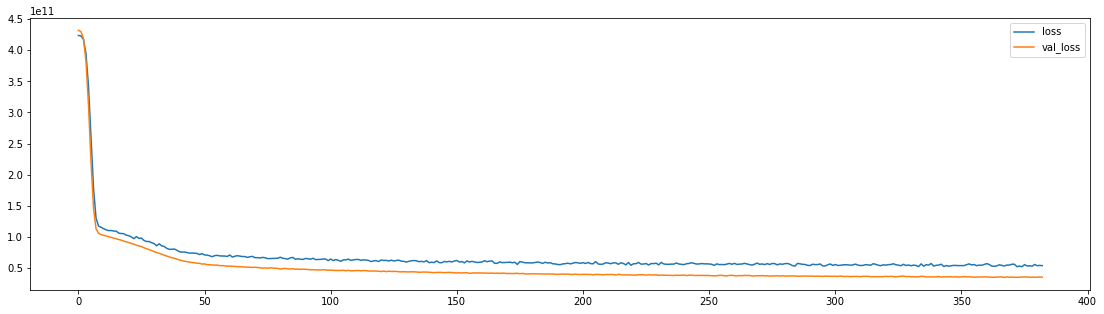

In [114]:
#PLOT LOSS
loss.plot(figsize =(19,5))

In [115]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error, explained_variance_score, r2_score

In [116]:
#PREDICT WITH TRAINED MODEL
y_pred=model.predict(X_test)

In [117]:
#CALCULATION OF THE MATRICS
print("mean_squared_error : ",mean_squared_error(y_test,y_pred))
print("mean_absolute_error : ",mean_absolute_error(y_test,y_pred))
print("explained_variance_score : ",explained_variance_score(y_test,y_pred))


mean_squared_error :  35154403725.112114
mean_absolute_error :  110829.84368647484
explained_variance_score :  0.7587889894092912


In [118]:
#PRINT THE ACCURACY OF THE MODEL
print("Accuracy : ",r2_score(y_test,y_pred)*100 ,"%")

Accuracy :  75.09247720550694 %


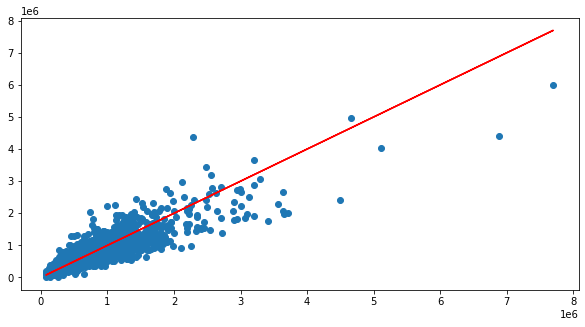

In [180]:
#MODEL PREDICTIONS
plt.figure(figsize=(10,5))
plt.scatter(x=y_test,y=y_pred)
#PERFECT MODEL PREDICTIONS
plt.plot(y_test,y_test,'r')

In [119]:
#USING LinearRegression FOR PREDICTION
from sklearn.linear_model import LinearRegression


In [120]:
#INITIALIZING AND TRAINING LINEAR REGRESSION MODEL
lr = LinearRegression();
lr.fit(X_train,y_train);

In [121]:
y_pred = lr.predict(X_test);

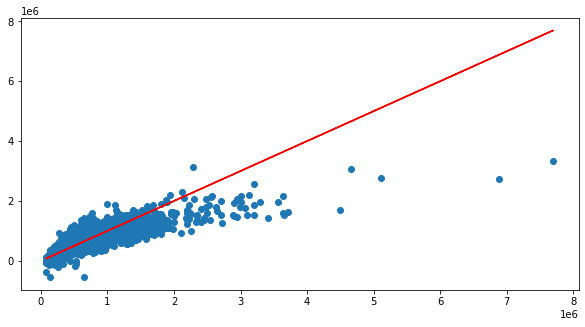

In [122]:
#MODEL PREDICTIONS
plt.figure(figsize=(10,5))
plt.scatter(x=y_test,y=y_pred)
#PERFECT MODEL PREDICTIONS
plt.plot(y_test,y_test,'r')

In [123]:
#CALCULATION OF THE MATRICS
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 126018.88268905859
Mean Squared Error: 43002217344.593376
Root Mean Squared Error: 207369.75995692663


In [124]:
print('Accuracy:',metrics.r2_score(y_test,y_pred.round())*100,"%")

Accuracy: 69.53216256232928 %
